## Ahmed Taha 
## 8/3/2022
## Here Is Implementation for KMeans algoramthim from scratch on iris data set 
## iris data set is data for flowers of differnt kinds and every kind are close to each other in some featuers like (SepalLengthCm,SepalWidthCm,PetalLengthCm ,PetalWidth) 
## so I do an unsupervised machine learning algorathim (kmeans ) to can classfiy the flowers according to those features
## The class Implemented conatins comments to can understand the code 

### Modules 

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## kmean algorathim  Class

In [265]:
class kmean_alg:  
  def __init__(self, x):
    self.x=x
    self.centroide=None
    self.idx=None 
               ############Intial the centroid by any number of clusters############
        
  def init_centroids(self,number_of_centroides):
        m, n = self.x.shape ##get the number of rows and number of featuers in the data
        self.centroide = np.zeros((number_of_centroides, n)) ##perfome an array if number of centers=3 and featuers =2 so it [[x11,x12],[x21,x22],[x31,x32]] where every point we choose are put
        idx = np.random.randint(0, m, number_of_centroides) ##an array of 3 numbers between 0 to 299 to take them as the centroides
        ## in this loop we take idx which we choose up then put them in centroids 
        for i in range(number_of_centroides):
            self.centroide[i,:] = self.x[idx[i],:]
        return self.centroide
    
               ############This Private Method used for fined the distance two every center############
        
  def __find_closest_centroids(self):
        m = self.x.shape[0] ## get the number of rows in the data
        k = self.centroide.shape[0] ## get the number of centroids 
        idx = np.zeros(m) ##makes an array of  numbers of the rows to can set every point to one of centroides 0,1,2
        for i in range(m):##will loop through all the rows 
            min_dist = 1000000##set the min distance to large number 
            for j in range(k):##loop throught the number of centroides ex:0,1,2
                dist = np.sum((self.x[i,:] - self.centroide[j,:]) ** 2) # compare the first row distance with every centroide to get the min distance 
                if dist < min_dist: ##here we compare if it min than the last one 
                    min_dist = dist ##change the min disdance if it min
                    idx[i] = j## set the row to min centroide 0 or 1 or 2 in our example
        return idx
    
             ############This Private Method used for compute new centroids by get the avg############
        
  def __compute_centroids(self,number_of_centroides):
        m, n = self.x.shape ## get number of rows and featuers 
        centroids = np.zeros((number_of_centroides, n))## an  array of zeros with same centroids number 3*2 in our example to calculate the average then put here the new centroides 
        for i in range(number_of_centroides): ##looping to set every centroide
            indices = np.where(self.idx == i) ## get the rows indecices where the rows are in the i group 
            centroids[i,:] = (np.sum(self.x[indices,:], axis=1) / len(indices[0])).ravel()## set the new centroid to average 
        return centroids 
    
            ############This Method used for fit the module by used above methods############
        
  def fit(self, max_iters):
    m, n = self.x.shape ##get the rows and featuers numbers in data
    k = self.centroide.shape[0] ##numbers of centrides
    self.idx = np.zeros(m)## set the idx with size of number of rows to all zeros [00000000]299
    for i in range(max_iters): ##loops by number which we needed
        self.idx = self.__find_closest_centroids() ## compute the rows which close to every centroide
        self.centroide = self.__compute_centroids(k) ## get the neww centroides 
    return self.idx, self.centroide 

           ############This Method used for return the wcss(within cluster sum of squares)############
    
  def back_draw_wcss(self,max_iters=5):
    m=self.x.shape[0]
    k=self.centroide.shape[0]
    distance=[]
    for i in range(max_iters): ##loops by number which we needed
            self.idx = self.__find_closest_centroids() ## compute the rows which close to every centroide
            self.centroide = self.__compute_centroids(k) ## get the neww centroides 
    for i in range(k): ##looping to set every centroide
            indices = np.where(self.idx == i) ## get the rows indecices where the rows are in the i group 
#             print(indices)
            d=np.sum((self.x[indices,:]-self.centroide[i,:])**2)
#             print(d)
            distance.append(d)
    return sum(distance)

                ############This Method used for predict an value for new x ############
  def perdict(self,new_x):
    m=self.centroide.shape[0]
    new_x=np.array(new_x)
    min_dist = 1000000
    the_pos=None
    for i in range(m):
       dist = np.sum((new_x-self.centroide[i,:]) ** 2) # compare the first row distance with every centroide to get the min distance 
       if dist < min_dist: ##here we compare if it min than the last one 
            min_dist = dist ##change the min disdance if it min
            the_pos=i
    return the_pos

## read the iris data set 

In [266]:
data=pd.read_csv("Iris.csv")

## Read the first 5 rows only

In [267]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Get the features from the data for the flowers only and drop the ids 

In [268]:
x=data.iloc[:,1:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Now will draw the WCSS(k vs within cluster sum of squares)

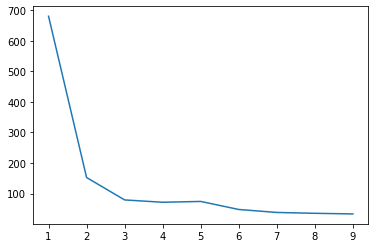

In [269]:
x=np.array(x)
kmean_module=kmean_alg(x)
y=[]
x_numberline=[]
for i in range(1,10):
    kmean_module.init_centroids(i)
#     print(kmean_module.back_draw_wcss())
    y.append(kmean_module.back_draw_wcss())
    x_numberline.append(i)
plt.plot(x_numberline,y)

## So we can shows from figure that the best number for k is 3

## Starts our algorathim by k of 3

In [260]:
kmean_module.init_centroids(3)

array([[5.2, 4.1, 1.5, 0.1],
       [7.7, 2.8, 6.7, 2. ],
       [6. , 3.4, 4.5, 1.6]])

## Now will do fiting by 5 epochs and shows the first two features Speall Length Vs Speall Width 

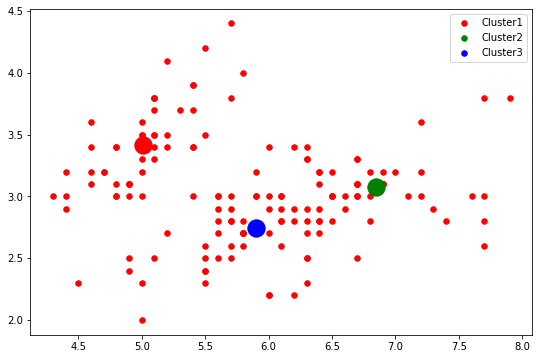

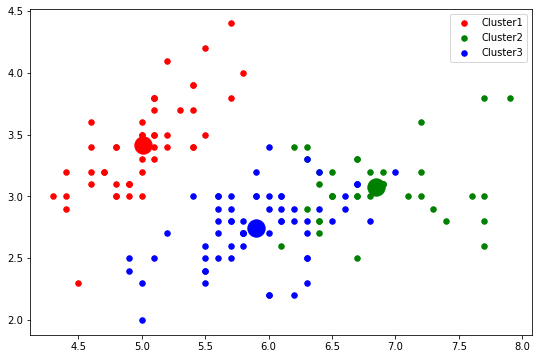

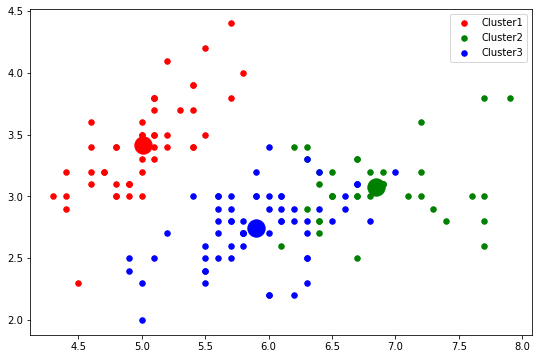

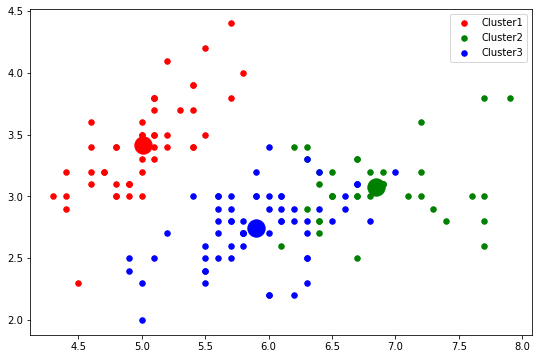

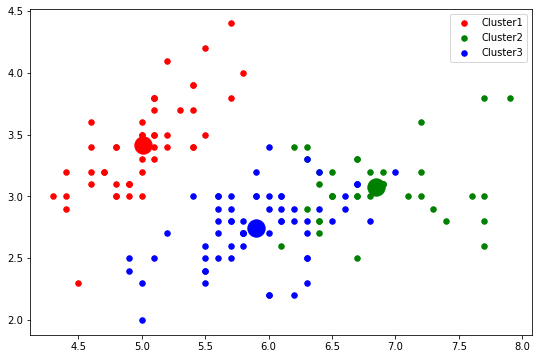

In [262]:
for i in range(5): ##here you can change the numbers of epochs
   idx, centroids = kmean_module.fit(i)
   # draw it
   cluster1 = x[np.where(idx == 0)[0],:]
   cluster2 = x[np.where(idx == 1)[0],:]
   cluster3 = x[np.where(idx == 2)[0],:]
   
   fig, ax = plt.subplots(figsize=(9,6))
   ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label="Cluster1")
   ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
   
   ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label="Cluster2")
   ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
 
   ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label="Cluster3")
   ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
   ax.legend()